In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_og = train.copy()
test_og = test.copy()
print(train_og.head(3))

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   
2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  


In [ ]:
# prints (rows, columns)
print(train_og.shape, test_og.shape)
print(train_og.columns)

(614, 13) (367, 12)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
13


In [ ]:
# prints the number of approved and disapproved loans in our train dataset
train_og['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# prints the percentages of approved and disapproved loans in our train dataset
train_og['Loan_Status'].value_counts(normalize=True) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

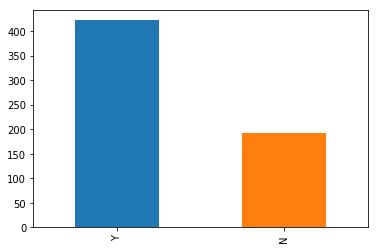

In [ ]:
train_og['Loan_Status'].value_counts().plot.bar()

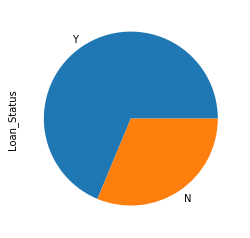

In [ ]:
train_og['Loan_Status'].value_counts().plot.pie()

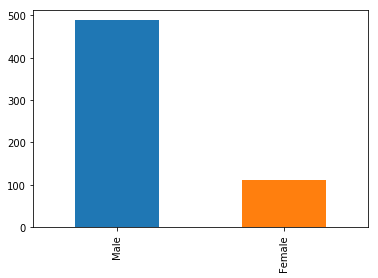

In [ ]:
train_og['Gender'].value_counts().plot.bar()

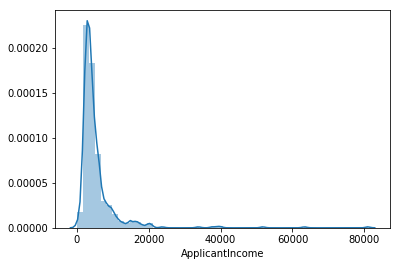

In [ ]:
# using the seaborn library to visualize applicant incomes
sns.distplot(train_og['ApplicantIncome'])

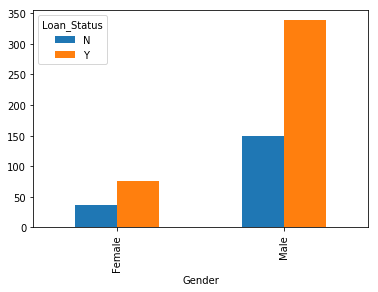

In [ ]:
# this will allow us to see if there's a correlation b/w gender and loan approval
pd.crosstab(train_og['Gender'],train_og['Loan_Status']).plot.bar()
# we can infer that there is no correlation since around half of each gender recieve loan approval (ie. both genders have the same proportion of approval)

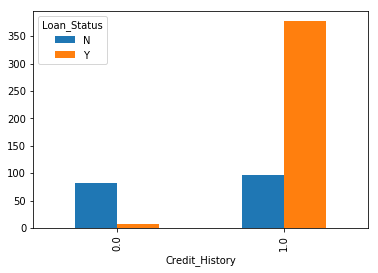

In [ ]:
pd.crosstab(train_og['Credit_History'],train_og['Loan_Status']).plot.bar()

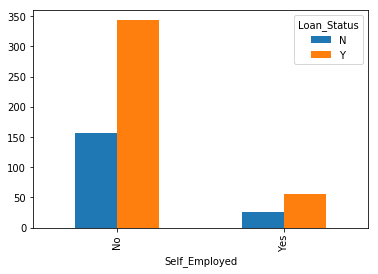

In [ ]:
pd.crosstab(train_og['Self_Employed'],train_og['Loan_Status']).plot.bar()

In [ ]:
train_og.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
train_og.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_og['LoanAmount'].isnull().sum()

22

In [ ]:
# replace null values
train_og['LoanAmount'].fillna(train_og['LoanAmount'].mode()[0],inplace=True)
train_og['LoanAmount'].isnull().sum()

0

In [ ]:
train_og['Credit_History'].fillna(train_og['Credit_History'].mode()[0],inplace=True)

In [ ]:
train_og['Loan_Amount_Term'].fillna(train_og['Loan_Amount_Term'].mode()[0],inplace=True)

#Using logistic regression for binary classification:

In [ ]:
# The logistic function is a S-shaped curve that will transform any value into the range 0 to 1. 
# This is why logistic regression is often used for binary classification problems (binary means there are 2 classes).
# The predictions made by logistic regression can also be used as the probability of a given data instance belonging to class 0 or class 1.
 
# LOAN ID is irrevelant to the classification so we are dropping that column.
train_og['Loan_ID'].head(5)
train_og = train_og.drop('Loan_ID', axis=1)
print(len(train_og.columns))

12


In [ ]:
import sklearn
X = train_og.drop('Loan_Status', axis=1)
y = train_og.Loan_Status

In [ ]:
train_og.dtypes
# the variables with object datatypes are categorical variables which mean that the data can be divided into groups
# for ex: the 'Education' variable has a value of 'Graduate' or 'Not Graduate'

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
print(train_og.head(1))

  Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       120.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  


In [ ]:
# we have to apply the get_dummy function to the categorical variables
# divides variable into its subgroups and assigns numerical values of 0 or 1 instead
# for example the first person is a male so Gender_Female is 0 so False and Gender_Male is 1 so True
X = pd.get_dummies(X)
train_og = pd.get_dummies(train_og)
test_og = pd.get_dummies(test_og)
print(train_og.head(1))

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0             1.0              0            1           1            0   

   Dependents_0      ...        Dependents_3+  Education_Graduate  \
0             1      ...                    0                   1   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0                       0                 1                  0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                    0                        0                    1   

   Loan_Status_N  Loan_Status_Y  
0              0              1  

[1 rows x 22 columns]


In [ ]:
# time to train our prediction model
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.35)

In [ ]:
# making sure there were no null values 
train_og.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# time for the model to make predictions
prediction = model.predict(x_cv)
# testing the accuracy of our predictions
accuracy_score(y_cv, prediction)

0.813953488372093